In [ ]:
import numpy as np
from matplotlib import pyplot as plt


def move_forward(bel):
    new_bel = np.zeros(20)
    for i in range(20):
        if i == 19: 
            new_bel[19] += bel[19]  # находясь в последней клетке, попытается двигаться вперед, то он останется в той же клетке 
        elif i == 18:  
            new_bel[18] += 0.25 * bel[18]
            new_bel[19] += 0.75 * bel[18]
        else:
            # Если робот, находясь в предпоследней клетке, попытается двигаться вперед, то он останется в этой
            # же клетке с вероятностью 25 %, а с вероятностью 75 % переместится в следующую клетку
            new_bel[i] += 0.25 * bel[i]
            if i + 1 < 20:
                new_bel[i + 1] += 0.5 * bel[i]
            if i + 2 < 20:
                new_bel[i + 2] += 0.25 * bel[i]
    return new_bel

def move_backward(bel):
    new_bel = np.zeros(20)
    for i in range(20):
        if i == 0:  
            new_bel[0] += bel[0]
        elif i == 1:  
            new_bel[0] += 0.75 * bel[1]
            new_bel[1] += 0.25 * bel[1]
        else:
            new_bel[i] += 0.25 * bel[i]
            if i - 1 >= 0:
                new_bel[i - 1] += 0.5 * bel[i]
            if i - 2 >= 0:
                new_bel[i - 2] += 0.25 * bel[i]
    return new_bel


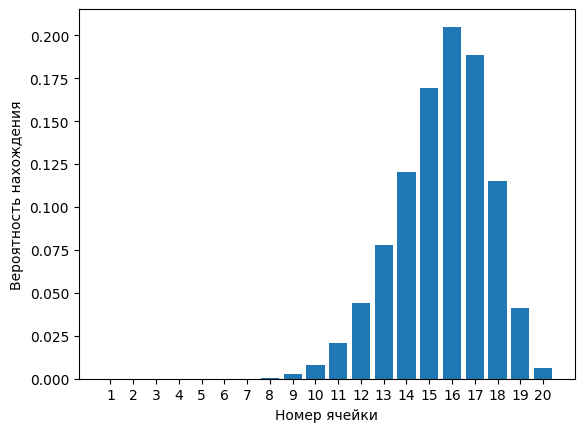

Сумма вероятностей: 1.0


In [7]:
bel = np.hstack((np.zeros(9), 1, np.zeros(10)))

for _ in range(9):
    bel = move_forward(bel)

for _ in range(3):
    bel = move_backward(bel)

plt.bar(range(1, 21), bel)
plt.xlabel('Номер ячейки')
plt.ylabel('Вероятность нахождения')
plt.xticks(range(1, 21))
plt.show()

print("Сумма вероятностей:", sum(bel))